Importons ce dont on a besoin. On va utiliser la méthode du "temps en avant et espace en arrière".

In [1]:
import numpy                       
from matplotlib import pyplot                 
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

Pour rappel, l'équation est (du/dt)+c(du/dx)=0

On veut avoir une échelle spatiale séparée en intervalles égales. Introduisons la variable nx qui sera l'indice du point spatiale dans cette grille. Introduisons également dx qui sera l'écart entre deux points successifs de cette grille. On va de x=0 à x=2.

De la même manière, on définit nt et dt (soit c=1).

In [59]:
nx = 41  # try changing this number from 41 to 81 and Run All ... what happens?
dx = 2/(nx-1)
nt = 25    
dt = .02  
c = 1      #assume wavespeed of c = 1
x = numpy.linspace(0,2,nx)

Maintenant, on veut créer la fonction initiale u(x,0) qui est égale à 2 entre 0.5 et 1 et vaut 1 sur le reste de [0,2].
La fonction numpy.ones(n) crée un vecteur rempli de 1 et de taille n.

In [60]:
u=numpy.ones(nx)

Créons deux vecteurs qui contiennent les indices pour x plus grand ou égal à 0.5 et ceux pour x plus petit ou égal à 1.
On va ensuite chercher leur intersection pour déterminer quels indices sont entre 0.5 et 1 ; on impose ensuite que u[de ces indices]=2

In [61]:
lbound = numpy.where(x >= 0.5)
ubound = numpy.where(x <= 1)
print(lbound)
print(ubound)

(array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40], dtype=int64),)
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20], dtype=int64),)


In [62]:
bounds = numpy.intersect1d( lbound, ubound)
u[bounds]=2

In [63]:
print(u)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]


(0, 2.5)

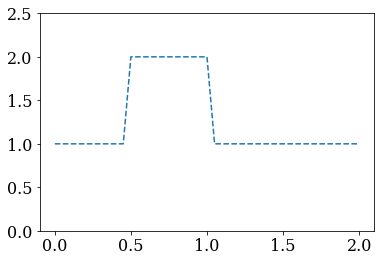

In [64]:
pyplot.plot(x,u, ls='--')
pyplot.ylim(0,2.5)

La "verticalité" du "carré" va augmenter si on augmente nx

Codons pour trouver la solution à l'équation.
Il y a deux boucles à parcourir : une boucle "espace" dans une boucle "temps". Pour chaque t, on range la solution u pour chaque x dans un vecteur appelé "u_n" (la boucle for sur n est juste pour avoir le bon nombre d'itérations, l'indice ne jour pas).Il est naturel qu'à la premiere itération de t, on démarre à u(x,t).

In [65]:
for n in range(1,nt):
    un=u.copy()
    for i in range(1,nx):
        u[i]=un[i]-c*dt/dx*(un[i]-un[i-1])

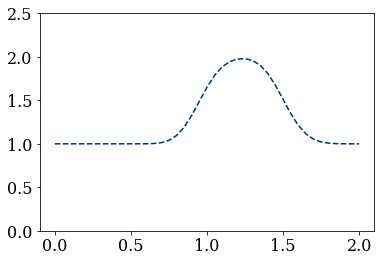

In [66]:
pyplot.plot(x, u, color='#003366', ls='--')
pyplot.ylim(0,2.5);

# Convection non-linéaire

Regardons à l'équation (du/dt)+u(du/dx)=0

On va de nouveau utiliser la méthode "différence temporelle avant" et "différence spatiale arrière". 

Réutilisons les mêmes conditions initiales (le même u(x,0)) et les mêmes valeurs de paramètres.

In [71]:
##problem parameters
nx = 41
dx = 2/(nx-1)
nt = 10    
dt = .02  

##initial conditions
u = numpy.ones(nx)      
u[numpy.intersect1d(lbound, ubound)]=2  

(0, 2.5)

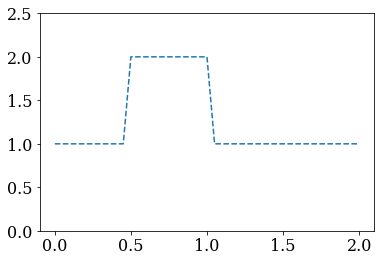

In [68]:
pyplot.plot(x, u,  ls='--')
pyplot.ylim(0,2.5)

Le schéma de la résolution est identique mais il y a le terme un[i] en plus à considérer ( à l'endroit où était c).

In [69]:
for j in range(1,nt):
    un=u.copy()
    for i in range(1,nx):
        u[i]=un[i]-un[i]*dt/dx*(un[i]-un[i-1])

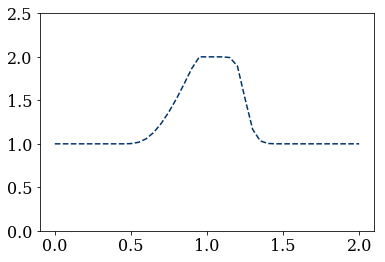

In [70]:
pyplot.plot(x, u, color='#003366', ls='--')
pyplot.ylim(0,2.5);

## Méthode alternative

Sans faire de boucle sur x, on peut travailler en une seule boucle en effectuant les opétarion sur tout le vecteur au lieu de parcourir les x un par un.

Réévaluons le u initial

In [74]:
##initial conditions
u = numpy.ones(nx)      
u[numpy.intersect1d(lbound, ubound)]=2 

In [75]:
for j in range(1,nt):
    un=u.copy()
    u[1:]=un[1:]-un[1:]*dt/dx*(un[1:]-un[0:-1])

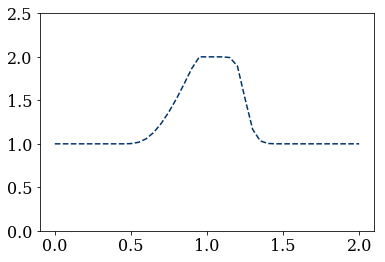

In [76]:
pyplot.plot(x, u, color='#003366', ls='--')
pyplot.ylim(0,2.5);